## NAME-A indu sri

Machine Learning  INTERNSHIP @TECHOHACKS

TASK-3

PROJECT NAME:Diabetes Prediction


# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", 
                "DiabetesPedigreeFunction", "Age", "Outcome"]

diabetes_df = pd.read_csv(url, header=None, names=column_names)


In [5]:
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#  Data Preprocessing


In [6]:
print(diabetes_df.isnull().sum())




Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)


In [8]:
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].mean(), inplace=True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].mean(), inplace=True)
diabetes_df['SkinThickness'].fillna(diabetes_df['SkinThickness'].median(), inplace=True)
diabetes_df['Insulin'].fillna(diabetes_df['Insulin'].median(), inplace=True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace=True)




In [9]:
print(diabetes_df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Exploratory Data Analysis (EDA)



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


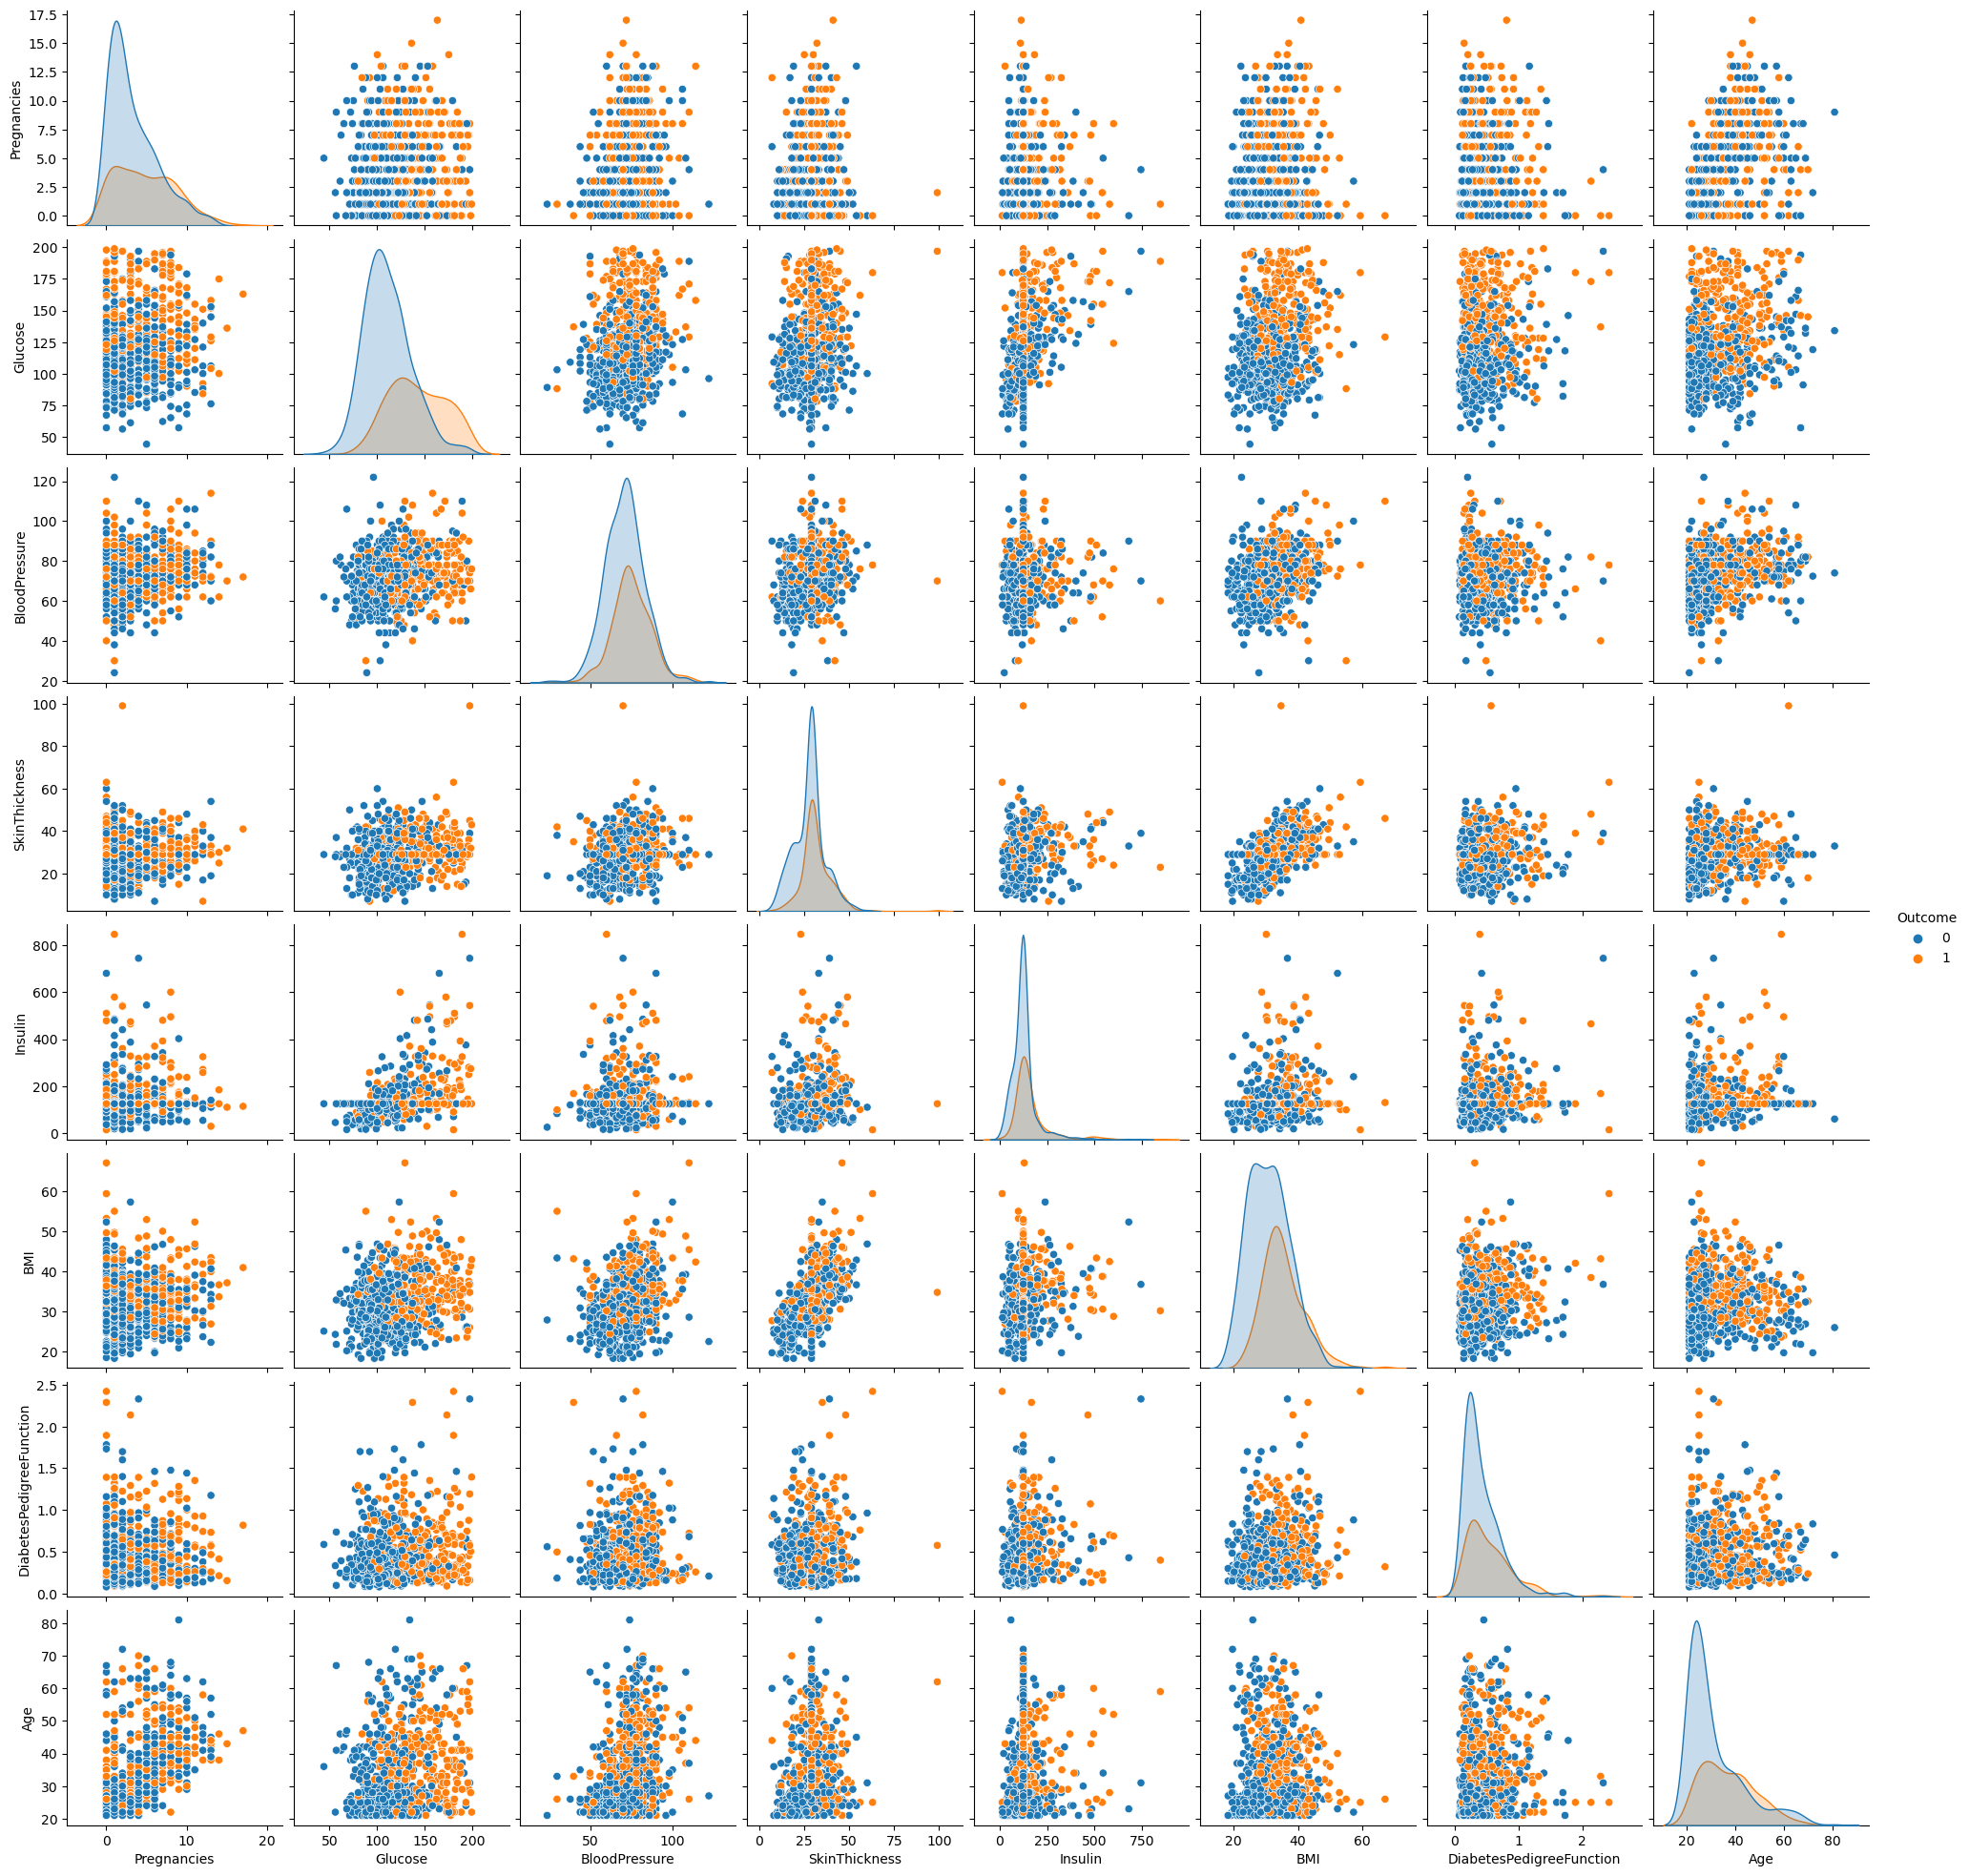

In [10]:
sns.pairplot(diabetes_df, hue='Outcome')
plt.show()

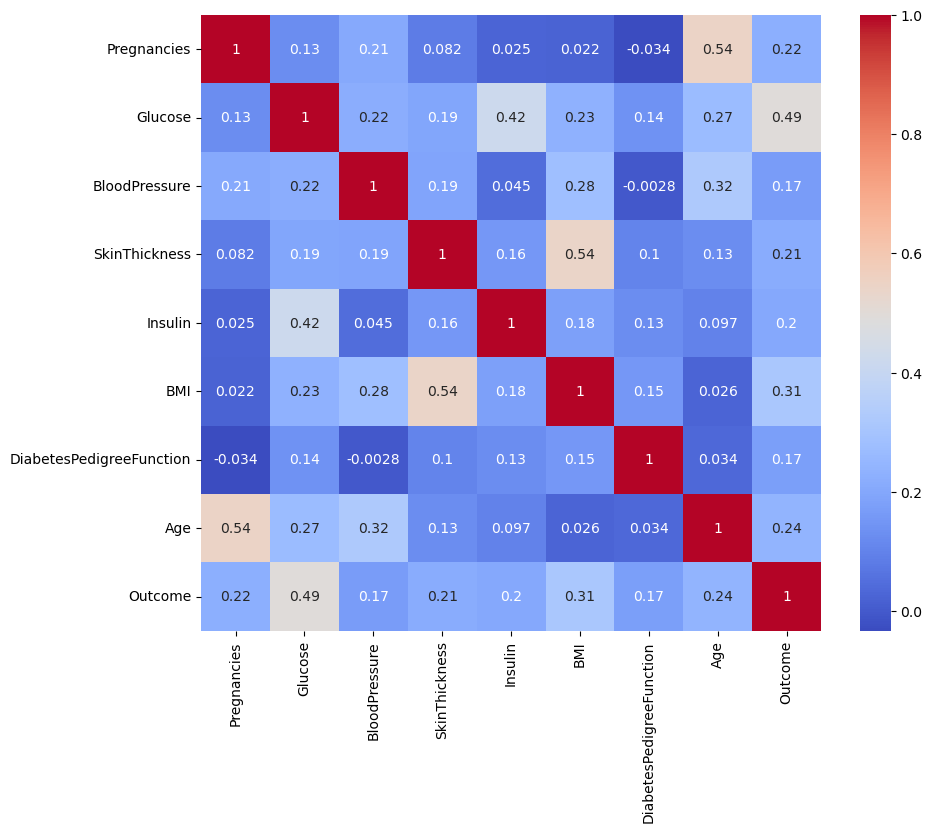

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Model Building


In [12]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation


In [18]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)


In [19]:

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Model")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Logistic Regression Model
Accuracy: 0.7532
Precision: 0.6667
Recall: 0.6182
F1 Score: 0.6415
AUC-ROC: 0.7232
Confusion Matrix:
[[82 17]
 [21 34]]


Decision Tree Model
Accuracy: 0.7143
Precision: 0.5902
Recall: 0.6545
F1 Score: 0.6207
AUC-ROC: 0.7010
Confusion Matrix:
[[74 25]
 [19 36]]


Random Forest Model
Accuracy: 0.7792
Precision: 0.6780
Recall: 0.7273
F1 Score: 0.7018
AUC-ROC: 0.7677
Confusion Matrix:
[[80 19]
 [15 40]]




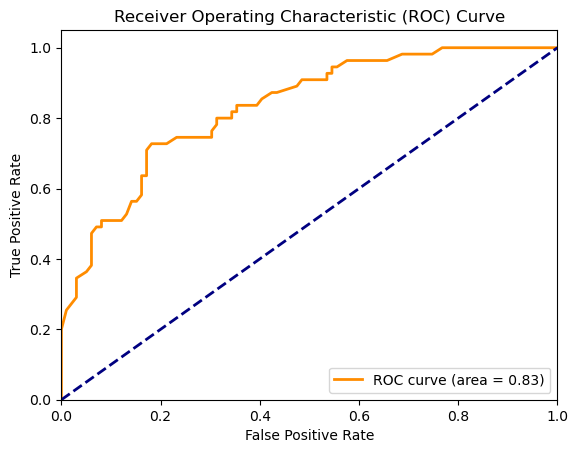

In [20]:
y_pred_prob = random_forest.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()